# Manutenção Preditiva (PHM) - Sistema de Propulsão Naval

Grupo: Rafael Schena e Gustavo Loguércio

Edit: Alteração dos gatilhos de target para os estados de Emergência, Alerta e Normal, adicionando mais 2 cenários para as proporções de estados dos equipamentos: (10% Emerg, 10% Alert, 80% Normal) e (5% Emerg, 5% Alert e 90% Normal) para observação do desempenho dos algoritmos.

## Metodologia

Foi utilizada neste trabalho a metodologia CRISP-DM (CRoss-Industry Standard Process for Data Mining)
![crisp-dm](img/crisp-dm.png)

Fases:
1. Business understanding – What does the business need?
2. Data understanding – What data do we have / need? Is it clean?
3. Data preparation – How do we organize the data for modeling?
4. Modeling – What modeling techniques should we apply?
5. Evaluation – Which model best meets the business objectives?
6. Deployment – How do stakeholders access the results?

(https://www.datascience-pm.com/crisp-dm-2/)

## 1 - Compreensão do problema de negócio (Business Understanding)
Este trabalho tem como objetivo principal a mineração de padrões em dados de manutenção preditiva (PHM - Predictive Health Monitoring) em um sistema de propulsão naval. O dataset utilizado foi disponibilizado é um dataset simulado em um modelo de um sistema de propulsão naval de uma fragata que utiliza uma turbina a gás como motor. O dataset foi disponibilizado pelos autores (M Altosole, G Benvenuto, M Figari, and U Campora) no repositório da UCI: http://archive.ics.uci.edu/ml/datasets/condition+based+maintenance+of+naval+propulsion+plants

Fragata:
![fragata](img/frigate.png)

Sistema de propulsão:
![propulsao](img/propulsion.png)
https://navalpost.com/propulsion-systems-navies-gas-diesel-electric/

Turbina a Gás (Termo mais correto: motor a reação):
![turbina](img/gas_turbine.png)
https://www.geaviation.com/sites/default/files/ge-marine-gas-turbines-for-frigates-2018-march.pdf

![mecanismo](img/turbine_mechanism.gif)

## Definição do problema de negócio (!!!)
O dataset não define o que caracteriza ou não uma falha no sistema de propulsão da fragata, apenas apresenta os índices de degradação dos estágios de compressão e da turbina. **Níveis de alerta de degradação serão definidos com base na distribuição dos índices de degradação do compressor (kMc) e da turbina (kMt).** Antes disso, será necessária uma melhor compreensão dos dados.

Dicionário de dados:
- 1 - Lever position (lp) [ ]
- 2 - Ship speed (v) [knots]
- 3 - Gas Turbine shaft torque (GTT) [kN m]
- 4 - Gas Turbine rate of revolutions (GTn) [rpm]
- 5 - Gas Generator rate of revolutions (GGn) [rpm]
- 6 - Starboard Propeller Torque (Ts) [kN]
- 7 - Port Propeller Torque (Tp) [kN]
- 8 - HP Turbine exit temperature (T48) [C]
- 9 - GT Compressor inlet air temperature (T1) [C]
- 10 - GT Compressor outlet air temperature (T2) [C]
- 11 - HP Turbine exit pressure (P48) [bar]
- 12 - GT Compressor inlet air pressure (P1) [bar]
- 13 - GT Compressor outlet air pressure (P2) [bar]
- 14 - Gas Turbine exhaust gas pressure (Pexh) [bar]
- 15 - Turbine Injecton Control (TIC) [%]
- 16 - Fuel flow (mf) [kg/s]
- 17 - GT Compressor decay state coefficient (kMc).
- 18 - GT Turbine decay state coefficient (kMt). 

## 2 - Compreensão dos dados (Data Understanding)

In [1]:
import pandas as pd
import numpy as np

In [2]:
features = [
    'lp',
    'v',
    'GTT',
    'GTn',
    'GGn',
    'Ts',
    'Tp',
    'T48',
    'T1',
    'T2',
    'P48',
    'P1',
    'P2',
    'Pexh',
    'TIC',
    'mf',
    'kMc',
    'kMt'
]

In [3]:
df = pd.read_csv('./data/data.txt', sep='   ', names=features, engine='python')

In [4]:
df.head()

,lp,v,GTT,GTn,GGn,Ts,Tp,T48,T1,T2,P48,P1,P2,Pexh,TIC,mf,kMc,kMt
0,1.138,3.0,289.964,1349.489,6677.380,7.584,7.584,464.006,288.0,550.563,1.096,0.998,5.947,1.019,7.137,0.082,0.95,0.975
1,2.088,6.0,6960.180,1376.166,6828.469,28.204,28.204,635.401,288.0,581.658,1.331,0.998,7.282,1.019,10.655,0.287,0.95,0.975
2,3.144,9.0,8379.229,1386.757,7111.811,60.358,60.358,606.002,288.0,587.587,1.389,0.998,7.574,1.020,13.086,0.259,0.95,0.975
3,4.161,12.0,14724.395,1547.465,7792.630,113.774,113.774,661.471,288.0,613.851,1.658,0.998,9.007,1.022,18.109,0.358,0.95,0.975
4,5.140,15.0,21636.432,1924.313,8494.777,175.306,175.306,731.494,288.0,645.642,2.078,0.998,11.197,1.026,26.373,0.522,0.95,0.975


In [5]:
df.shape

(11934, 18)

### Verificação valores faltantes e tipos de dados

In [6]:
# Não há valores faltantes, todas as variáveis são numéricas do tipo float64
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11934 entries, 0 to 11933
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   lp      11934 non-null  float64
 1   v       11934 non-null  float64
 2   GTT     11934 non-null  float64
 3   GTn     11934 non-null  float64
 4   GGn     11934 non-null  float64
 5   Ts      11934 non-null  float64
 6   Tp      11934 non-null  float64
 7   T48     11934 non-null  float64
 8   T1      11934 non-null  float64
 9   T2      11934 non-null  float64
 10  P48     11934 non-null  float64
 11  P1      11934 non-null  float64
 12  P2      11934 non-null  float64
 13  Pexh    11934 non-null  float64
 14  TIC     11934 non-null  float64
 15  mf      11934 non-null  float64
 16  kMc     11934 non-null  float64
 17  kMt     11934 non-null  float64
dtypes: float64(18)
memory usage: 1.6 MB


### Estatísticas das features numéricas

In [7]:
df.describe()

,lp,v,GTT,GTn,GGn,Ts,Tp,T48,T1,T2,P48,P1,P2,Pexh,TIC,mf,kMc,kMt
count,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.0,11934.000000,11934.000000,1.193400e+04,11934.000000,11934.000000,11934.000000,11934.000000,11934.00000,11934.0000
mean,5.166667,15.000000,27247.498685,2136.289256,8200.947312,227.335768,227.335768,735.495446,288.0,646.215331,2.352963,9.980000e-01,12.297123,1.029474,33.641261,0.662440,0.97500,0.9875
std,2.626388,7.746291,22148.613155,774.083881,1091.315507,200.495889,200.495889,173.680552,0.0,72.675882,1.084770,2.533635e-13,5.337448,0.010390,25.841363,0.507132,0.01472,0.0075
min,1.138000,3.000000,253.547000,1307.675000,6589.002000,5.304000,5.304000,442.364000,288.0,540.442000,1.093000,9.980000e-01,5.828000,1.019000,0.000000,0.068000,0.95000,0.9750
25%,3.144000,9.000000,8375.883750,1386.758000,7058.324000,60.317000,60.317000,589.872750,288.0,578.092250,1.389000,9.980000e-01,7.447250,1.020000,13.677500,0.246000,0.96200,0.9810
50%,5.140000,15.000000,21630.659000,1924.326000,8482.081500,175.268000,175.268000,706.038000,288.0,637.141500,2.083000,9.980000e-01,11.092000,1.026000,25.276500,0.496000,0.97500,0.9875
75%,7.148000,21.000000,39001.426750,2678.079000,9132.606000,332.364750,332.364750,834.066250,288.0,693.924500,2.981000,9.980000e-01,15.658000,1.036000,44.552500,0.882000,0.98800,0.9940
max,9.300000,27.000000,72784.872000,3560.741000,9797.103000,645.249000,645.249000,1115.797000,288.0,789.094000,4.560000,9.980000e-01,23.140000,1.052000,92.556000,1.832000,1.00000,1.0000


In [8]:
for col in df.columns:
    print(f'Valores únicos de {col}: {len(df[col].unique())}')

Valores únicos de lp: 9
Valores únicos de v: 9
Valores únicos de GTT: 11430
Valores únicos de GTn: 3888
Valores únicos de GGn: 11834
Valores únicos de Ts: 4286
Valores únicos de Tp: 4286
Valores únicos de T48: 11772
Valores únicos de T1: 1
Valores únicos de T2: 11506
Valores únicos de P48: 524
Valores únicos de P1: 1
Valores únicos de P2: 4209
Valores únicos de Pexh: 19
Valores únicos de TIC: 8496
Valores únicos de mf: 696
Valores únicos de kMc: 51
Valores únicos de kMt: 26


### Verificando a presença de outliers nos dados

In [9]:
import matplotlib.pyplot as plt

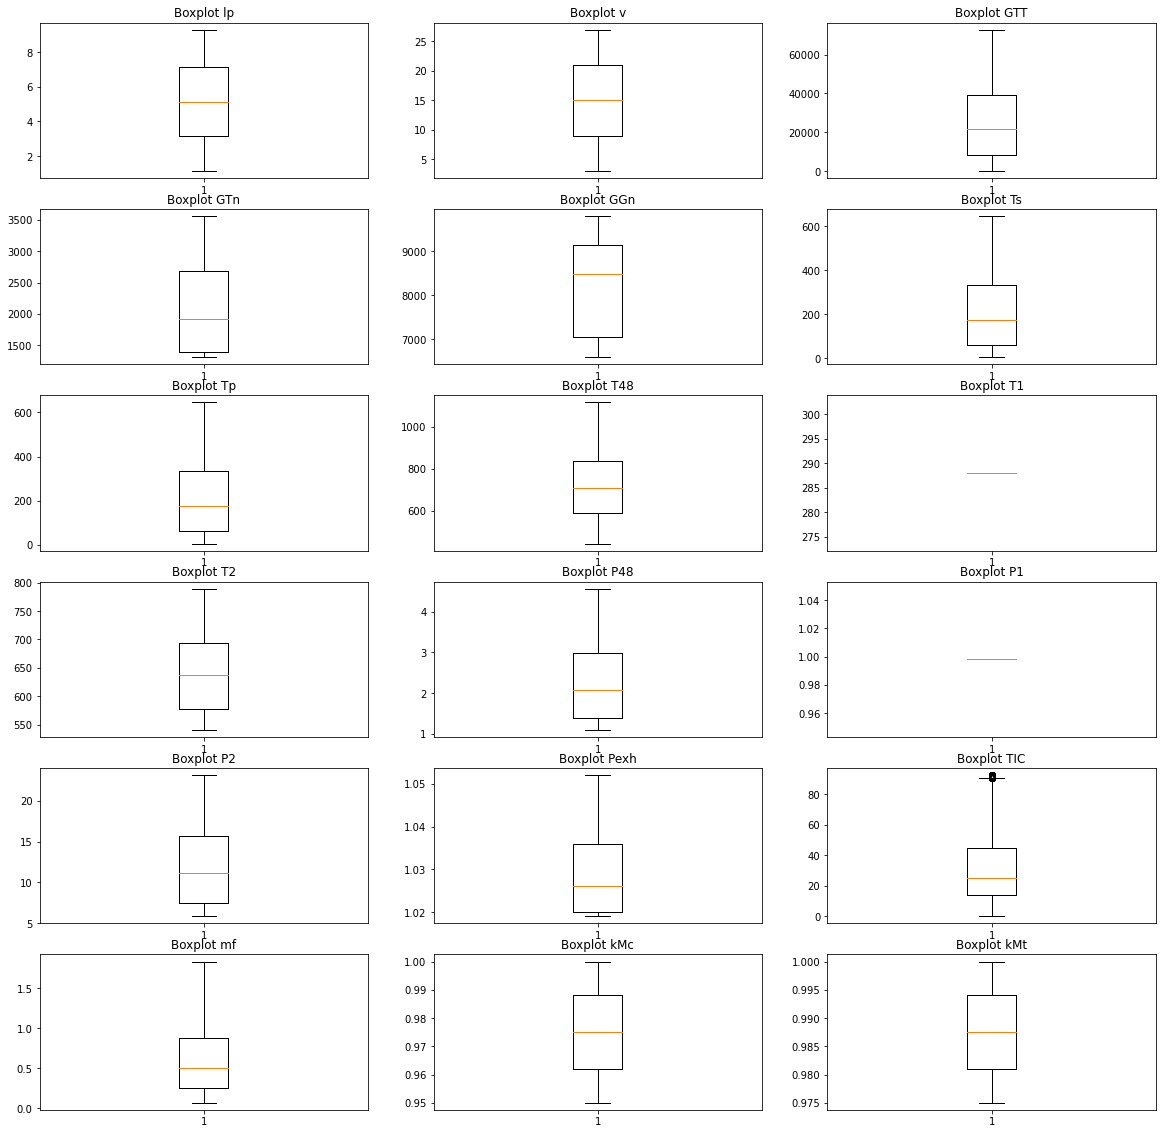

In [10]:
fig, ax_matrix = plt.subplots(6, 3, figsize=(20, 20));

# Atribuir um subgráfico para cada feature
mapeamento = {}
for (i, f) in enumerate(features):
    mapeamento[f] = ax_matrix[i//3][i%3]

for feat in features:
    mapeamento[feat].set_title(f'Boxplot {feat}')
    mapeamento[feat].boxplot(df[feat])
    
plt.show()

### Constatações:
- As features T1 e P1 não apresentam variabilidade e podem ser eliminadas do dataset, porque não contribuem para a previsibilidade das variáveis target;
- A feature TIC apresenta outliers que merecem ser investigados mais a fundo;

## Verificação da distribuição dos dados

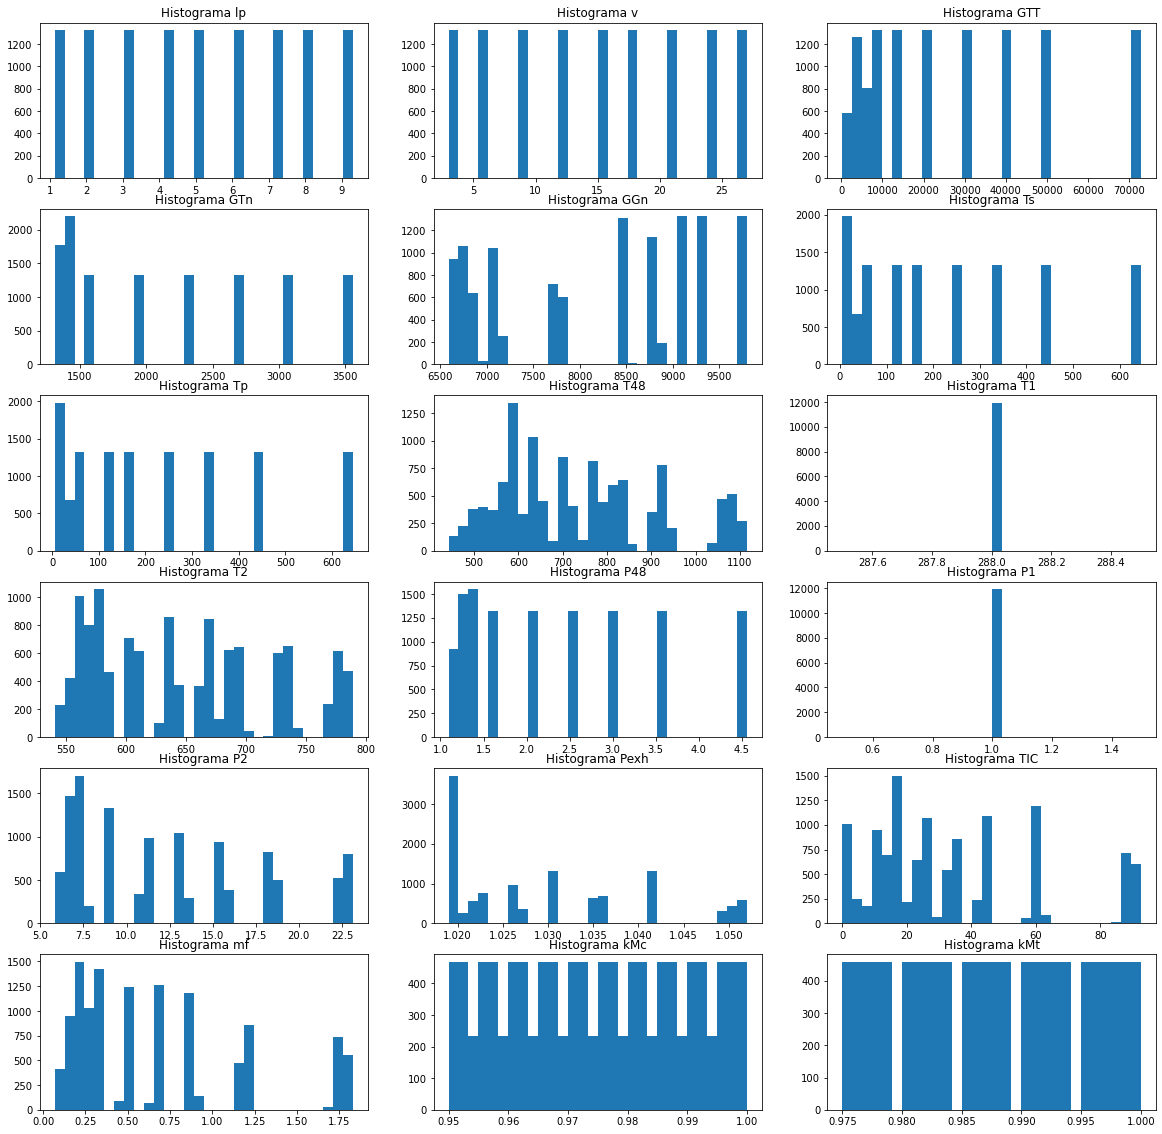

In [11]:
fig, ax_matrix = plt.subplots(6, 3, figsize=(20, 20));

# Atribuir um subgráfico para cada feature
mapeamento = {}
for (i, f) in enumerate(features):
    mapeamento[f] = ax_matrix[i//3][i%3]

for feat in features:
    mapeamento[feat].set_title(f'Histograma {feat}')
    mapeamento[feat].hist(df[feat], bins=30)
    
plt.show()

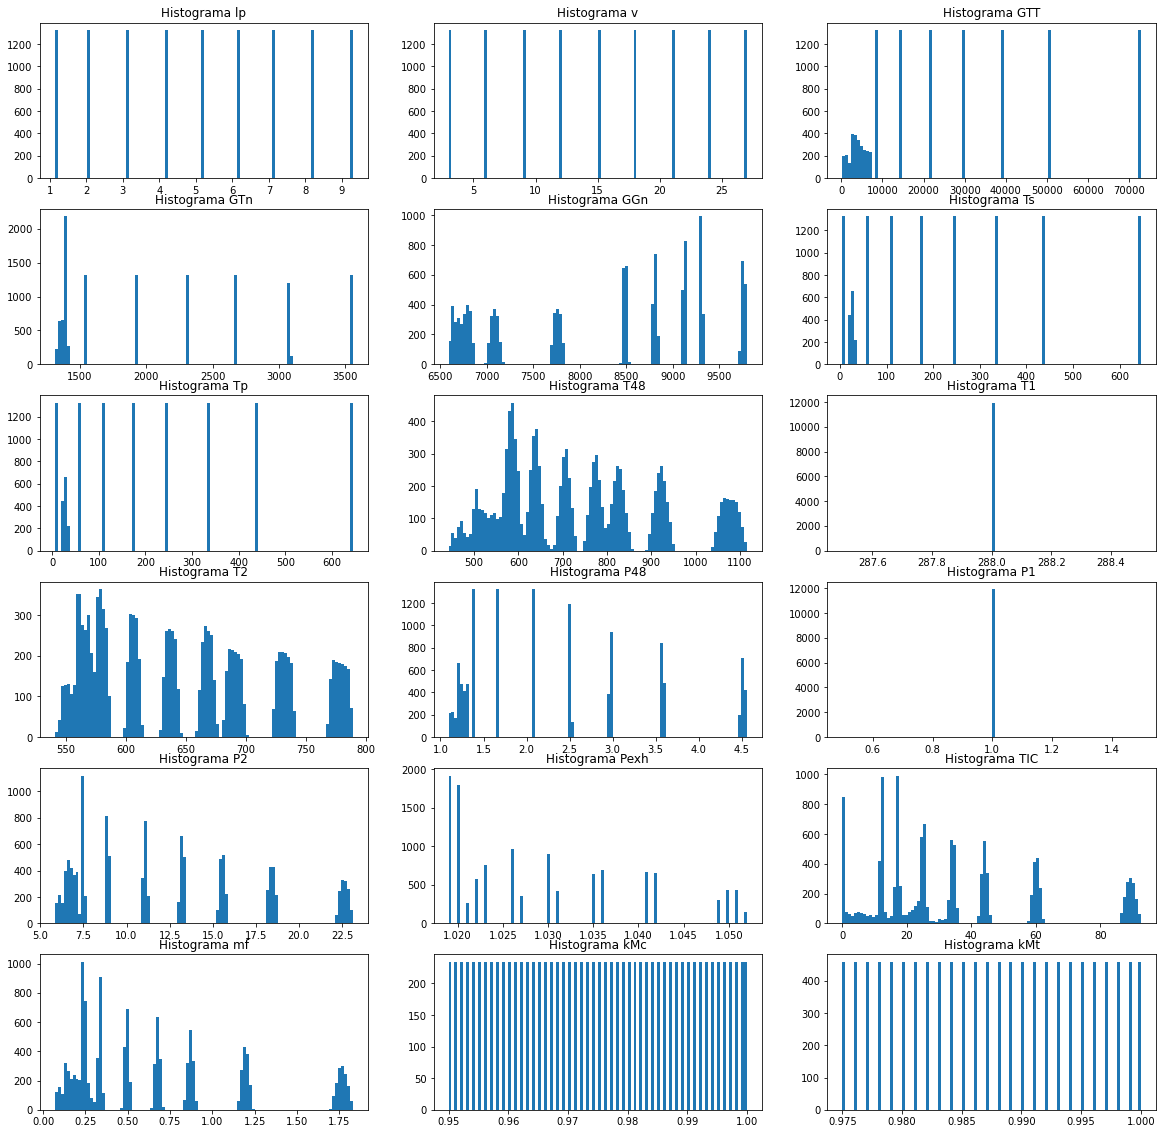

In [12]:
fig, ax_matrix = plt.subplots(6, 3, figsize=(20, 20));

# Atribuir um subgráfico para cada feature
mapeamento = {}
for (i, f) in enumerate(features):
    mapeamento[f] = ax_matrix[i//3][i%3]

for feat in features:
    mapeamento[feat].set_title(f'Histograma {feat}')
    mapeamento[feat].hist(df[feat], bins=100)
    
plt.show()

In [26]:
# Função para inserção de erro
# Desvio padrão default é 1% do valor apontado.
from random import gauss
def insere_erro(valor, erro=0.01):
    valor_com_erro = gauss(valor, erro*valor)
    return valor_com_erro

In [28]:
insere_erro(1, 0.05)

0.97351073595073

In [ ]:
# Aplicar função erro ao data

### Constatações
- Os dados não se apresentam na forma de séries temporais, uma vez que não têm associado um timestamp e nenhuma indicação de que estão em uma sequência no tempo;
- Na distribuição estatística dos dados (histogramas) podem ser verificados muitos gaps, indicando que existem faixas de valores que não constam no conjunto de dados, apesar de se tratar de um dataset composto somente por variáveis contínuas. Tal característica da distribuição dos dados permite que se efetue uma discretização destas grandezas com uma menor perda de informação (erro de quantização). Isto sugere que pode ser interessante a criação de novas features a partir da discretização das features originais.
- Faixas de variação muito diferentes entre as features;
- Os outliers da feature TIC representam os valores acima de 80% da capacidade de injeção de combustível na turbina. Representam os casos em que a fragata demandou uma aceleração maior e somam cerca de 1200 observações no dataset (aproximadamente 10% das observações). Decidiu-se por manter estes valores por representarem situações de operação normal do equipamento.

## (!!!) Definição do problema de negócio com base nos dados
Para os targets kMc e kMt fica **arbitrariamente** definido:

Cenário 0:
- **Emergência**: faixa de 33% piores valores possíveis para o range observado;
- **Alerta**: faixa entre 33% e 66% piores valores possíveis para o range observado;
- **Normal**: faixa de 33% melhores valores possíveis para o range observado.

Cenário 1:
- **Emergência**: faixa de 10% piores valores possíveis para o range observado;
- **Alerta**: faixa entre 10% e 20% piores valores possíveis para o range observado;
- **Normal**: faixa de 80% melhores valores possíveis para o range observado.

Cenário 2:
- **Emergência**: faixa de 5% piores valores possíveis para o range observado;
- **Alerta**: faixa entre 5% e 10% piores valores possíveis para o range observado;
- **Normal**: faixa de 90% melhores valores possíveis para o range observado.

In [ ]:
range_kMc = df['kMc'].max() - df['kMc'].min()

In [ ]:
# Proporções percentuais para os cenários 0, 1 e 2, respectivamente, como tuplas na lista proporções
cenarios = [(0.33, 0.66),
             (0.1, 0.2),
             (0.05, 0.1)]

In [ ]:
# Lista com os valores limites de kMc para alerta e emergência para os três cenários
lim_comp = []

for c in cenarios:
    lim = {}
    lim['emerg'] = df['kMc'].min() + c[0]*range_kMc
    lim['alert'] = df['kMc'].min() + c[1]*range_kMc
    lim_comp.append(lim)

In [ ]:
for k in range(len(lim_comp)):
    print(f'Níveis de emergência e alerta de kMc para o cenário {k}: {lim_comp[k]}')

In [ ]:
# Lista com os valores limites de kMc para alerta e emergência para os três cenários
range_kMt = df['kMt'].max() - df['kMt'].min()
lim_turb = []

for c in cenarios:
    lim = {}
    lim['emerg'] = df['kMt'].min() + c[0]*range_kMt
    lim['alert'] = df['kMt'].min() + c[1]*range_kMt
    lim_turb.append(lim)

In [ ]:
for k in range(len(lim_turb)):
    print(f'Níveis de emergência e alerta de kMt para o cenário {k}: {lim_turb[k]}')

In [ ]:
for k in range(len(cenarios)):
    fig, ax = plt.subplots(1, 2, figsize=(16, 4))
    fig.suptitle(f'Cenário {k}')
    
    ax[0].set_title(f'Histograma kMc')
    ax[0].axvline(lim_comp[k]['alert'], color='orange', lw=2, alpha=1)
    ax[0].axvline(lim_comp[k]['emerg'], color='red', lw=2, alpha=1)
    ax[0].hist(df['kMc'], bins=30, alpha = 0.3);

    ax[1].set_title(f'Histograma kMt')
    ax[1].axvline(lim_turb[k]['alert'], color='orange', lw=2, alpha=1)
    ax[1].axvline(lim_turb[k]['emerg'], color='red', lw=2, alpha=1)
    ax[1].hist(df['kMt'], bins=30, alpha = 0.3);

### Exclusão das features que não acrescentam informação ao dataset:

In [ ]:
# Excluindo as features que não apresentam variabilidade
df.drop(columns=['T1', 'P1'], inplace=True)
features = df.columns
df.head()

In [ ]:
type(lim_comp[k]['emerg'])

### Criação dos labels das variáveis target

In [ ]:
# status_c é o status do compressor, podendo assumir valores 'Emerg', 'Alert', 'Normal'
df['status_c_0'] = pd.cut(df['kMc'], bins=[0, lim_comp[0]['emerg'], lim_comp[0]['alert'], float('Inf')], labels=['Emerg', 'Alert', 'Normal'])
# status_t é o status do compressor, podendo assumir valores 'Emerg', 'Alert', 'Normal'
df['status_t_0'] = pd.cut(df['kMt'], bins=[0, lim_turb[0]['emerg'], lim_turb[0]['alert'], float('Inf')], labels=['Emerg', 'Alert', 'Normal'])

df['status_c_1'] = pd.cut(df['kMc'], bins=[0, lim_comp[1]['emerg'], lim_comp[1]['alert'], float('Inf')], labels=['Emerg', 'Alert', 'Normal'])
df['status_t_1'] = pd.cut(df['kMt'], bins=[0, lim_turb[1]['emerg'], lim_turb[1]['alert'], float('Inf')], labels=['Emerg', 'Alert', 'Normal'])

df['status_c_2'] = pd.cut(df['kMc'], bins=[0, lim_comp[2]['emerg'], lim_comp[2]['alert'], float('Inf')], labels=['Emerg', 'Alert', 'Normal'])
df['status_t_2'] = pd.cut(df['kMt'], bins=[0, lim_turb[2]['emerg'], lim_turb[2]['alert'], float('Inf')], labels=['Emerg', 'Alert', 'Normal'])

In [ ]:
df

In [ ]:
df.groupby('status_c_0').count()['kMc']

In [ ]:
df.groupby('status_t_0').count()['kMt']

In [ ]:
df.groupby('status_c_1').count()['kMc']

In [ ]:
df.groupby('status_t_1').count()['kMt']

In [ ]:
df.groupby('status_c_2').count()['kMc']

In [ ]:
df.groupby('status_t_2').count()['kMt']

### Constatações:
- Cenário 0: Classes balanceadas, não se faz necessária nenhuma técnica de balanceamento do dataset (consequência da escolha arbitrária dos limiares críticos.
- Cenário 1: Classes desbalanceadas, pode acarretar viés no modelo devido à maior quantidade de exemplos da classe normal. Não faria sentido, contudo, utilizar alguma técnica de oversampling sobre dados simulados, quando se poderia gerar mais dados simulados para estas condições. Pode caber uma técnica de undersampling.
- Cenário 2: Classes desbalanceadas do que no cenário 1, pode acarretar viés no modelo devido à maior quantidade de exemplos da classe normal. Não faria sentido, contudo, utilizar alguma técnica de oversampling sobre dados simulados, quando se poderia gerar mais dados simulados para estas condições. Pode caber uma técnica de undersampling.

### Exclusão das variáveis kMc e kMt do dataset que será fornecido aos modelos de classificação, uma vez que as mesmas foram discretizadas nas variáveis status_c e status_t.

In [ ]:
df2 = df.drop(columns=['kMc', 'kMt'])
df2

## 4 - Modelagem

### Divisão dos datasets de treino e teste para as duas variáveis target  para cada cenário k: status_c_k e status_t_k

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from math import floor

In [ ]:
df2.columns

In [ ]:
df2

In [ ]:
X = df2.drop(columns=['status_c_0', 'status_t_0', 'status_c_1', 'status_t_1', 'status_c_2', 'status_t_2'])

In [ ]:
y = [df[col] for col in ['status_c_0', 'status_t_0', 'status_c_1', 'status_t_1', 'status_c_2', 'status_t_2']]

In [ ]:
# Cria uma lista de dados de treino e teste de acordo com a lista de vetores de saída y
# Índice 0: X_train, X_test, y_train, y_test para a saída status_c_0, etc.
conj_treino_teste = []
for saida in y:
    X_train, X_test, y_train, y_test = train_test_split(X, saida, test_size=0.3)
    conj_treino_teste.append([X_train, X_test, y_train, y_test])

## Teste de modelos de classificação

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report

In [ ]:
import warnings
warnings.simplefilter("ignore")

In [ ]:
# Para cada saída que se quer prever, cria-se uma instância de um dos modelos de classificação
# Ou seja, 6 modelos para 6 saídas, 36 treinamentos distintos
modelos = [
    {'DecisionTree_comp_0': DecisionTreeClassifier(),
    'RandomForest_comp_0': RandomForestClassifier(),
    'KNN_comp_0': KNeighborsClassifier(),
    'GaussianNB_comp_0': GaussianNB(),
    'SVC_comp_0': SVC(),
    'AdaBoost_comp_0': AdaBoostClassifier()},
    
    {'DecisionTree_turb_0': DecisionTreeClassifier(),
    'RandomForest_turb_0': RandomForestClassifier(),
    'KNN_turb_0': KNeighborsClassifier(),
    'GaussianNB_turb_0': GaussianNB(),
    'SVC_turb_0': SVC(),
    'AdaBoost_turb_0': AdaBoostClassifier()},
    
    {'DecisionTree_comp_1': DecisionTreeClassifier(),
    'RandomForest_comp_1': RandomForestClassifier(),
    'KNN_comp_1': KNeighborsClassifier(),
    'GaussianNB_comp_1': GaussianNB(),
    'SVC_comp_1': SVC(),
    'AdaBoost_comp_1': AdaBoostClassifier()},    
    
    {'DecisionTree_turb_1': DecisionTreeClassifier(),
    'RandomForest_turb_1': RandomForestClassifier(),
    'KNN_turb_1': KNeighborsClassifier(),
    'GaussianNB_turb_1': GaussianNB(),
    'SVC_turb_1': SVC(),
    'AdaBoost_turb_1': AdaBoostClassifier()},
    
    {'DecisionTree_comp_2': DecisionTreeClassifier(),
    'RandomForest_comp_2': RandomForestClassifier(),
    'KNN_comp_2': KNeighborsClassifier(),
    'GaussianNB_comp_2': GaussianNB(),
    'SVC_comp_2': SVC(),
    'AdaBoost_comp_2': AdaBoostClassifier()},
    
    {'DecisionTree_turb_2': DecisionTreeClassifier(),
    'RandomForest_turb_2': RandomForestClassifier(),
    'KNN_turb_2': KNeighborsClassifier(),
    'GaussianNB_turb_2': GaussianNB(),
    'SVC_turb_2': SVC(),
    'AdaBoost_turb_2': AdaBoostClassifier()}]

In [ ]:
result = {'Modelo': [], 'Estagio': [], 'Cenario': [], 'Acuracia': [], 'Recall_Emerg': [], 'F1-score_Emerg': []}

In [ ]:
%%time
i = 0
for dic_mod, data in zip(modelos, conj_treino_teste):
    for mod in dic_mod:
        print('#################################################################')
        
        result['Modelo'].append(mod)
        print(f'Modelo {mod}')
               
        # São 12 modelos para cada cenário
        result['Cenario'].append(floor(i/12))
        print(f'Cenário {floor(i/12)}')

        # Primeira metade dos modelos do cenário são compressor, outra metade turbina
        if(floor(i/6)%2) == 0:
            result['Estagio'].append('Compressor')
            print('Estágio: Compressor')
        else:
            result['Estagio'].append('Turbina')
            print('Estágio: Turbina')
            
        i+=1
        
        # Treinando o modelo
        dic_mod[mod].fit(data[0], data[2])
        
        # Fazendo previsões
        Y_pred = dic_mod[mod].predict(data[1])
        
        # Resultado
        report = classification_report(data[3], Y_pred, output_dict=True)
        print(report)
        
        # Gravando resultados do report em um dataframe para comparação posterior
        result['Acuracia'].append(report['accuracy'])
        result['Recall_Emerg'].append(report['Emerg']['recall'])
        result['F1-score_Emerg'].append(report['Emerg']['f1-score'])
    
resultados = pd.DataFrame.from_dict(result)

In [ ]:
# Dataset resultante com os resultados coletados do treinamento dos modelos
resultados

## 5 - Avaliação dos Resultados (Evaluation)

As métricas utilizadas para avaliação do modelo serão a acurácia total a revocação (recall) da classe 'Emerg'. Isto porque a primeira mede o índice geral de acerto do modelo e a segunda mede o quanto o modelo é sensível para detectar o caso mais crítico, que é quando a manutenção tem que ser executada de maneira emergencial. Um balanço entre as duas é desejável, uma vez que de nada adiantaria um recall de 100% com um modelo que atribuísse 100% das saídas ao status 'Emerg' e estivesse errado em todos os demais casos.

![recall](img/recall.png)

### Cenário 0:

In [ ]:
# Resultados para o compressor
resultados[(resultados['Cenario']==0) & (resultados['Estagio']=='Compressor')].sort_values(by='Acuracia', ascending=False)

In [ ]:
# Resultados para a turbina
resultados[(resultados['Cenario']==0) & (resultados['Estagio']=='Turbina')].sort_values(by='Acuracia', ascending=False)

### Cenário 1:

In [ ]:
# Resultados para o compressor
resultados[(resultados['Cenario']==1) & (resultados['Estagio']=='Compressor')].sort_values(by='Acuracia', ascending=False)

In [ ]:
# Resultados para a turbina
resultados[(resultados['Cenario']==1) & (resultados['Estagio']=='Turbina')].sort_values(by='Acuracia', ascending=False)

### Cenário 2:

In [ ]:
# Resultados para o compressor
resultados[(resultados['Cenario']==2) & (resultados['Estagio']=='Compressor')].sort_values(by='Acuracia', ascending=False)

In [ ]:
# Resultados para a turbina
resultados[(resultados['Cenario']==2) & (resultados['Estagio']=='Turbina')].sort_values(by='Acuracia', ascending=False)